# Illustration of the feedforward neural network's performance for a regression task using the example of approximating two- and three-dimensional functions on a given interval

In [1]:
import time

import matplotlib.pyplot as plt
import torch

from vladk_neural_network.model.activation import Linear, Relu
from vladk_neural_network.model.base import NeuralNetwork
from vladk_neural_network.model.layer import FullyConnected, Input
from vladk_neural_network.model.loss import MeanSquaredError
from vladk_neural_network.model.metric import R2Score
from vladk_neural_network.model.optimizer import SGD, Adam

## Functions (2d and 3d) whose values we will predict using a neural network

In [2]:
def func_quad(arg):
    return 0.5 * arg**2 + 2 * arg - 1

def func_linear(arg):
    return -1.0 * arg - 1

def func_quad_3d(arg_x, arg_y):
    return 0.2 * arg_x**2 + 0.2 * arg_y**2

def func_sin_plus_cos_3d(arg_x, arg_y):
    return torch.sin(arg_x) + torch.cos(arg_y)

## Helper functions for plotting graphs of functions and displaying changes in loss and R2 score with the change of epochs

In [3]:
def plot_func(x, y, title):
    plt.figure(figsize=(10, 8))
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.grid(True)
    plt.show()

In [4]:
def plot_func_3d(x, y, z, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x, y, z, cmap="viridis")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("f(X, Y)")
    plt.title(title)
    plt.grid(True)
    plt.show()

In [5]:
def plot_loss(epoch, train_loss, test_loss, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_loss, color='r', label='Train')
    plt.plot(epoch, test_loss, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

In [6]:
def plot_r2_score(epoch, train_metric, test_metric, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_metric, color='r', label='Train')
    plt.plot(epoch, test_metric, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

## Functions for generating train/test data

In [7]:
def generate_train_test_data(func):

    x = torch.linspace(-5, 5, 100)

    train_data = []

    for x_i in x:
        train_data.append(
            {
                "input": [x_i],
                "output": [func(x_i)],
            }
        )

    x = torch.linspace(-5, 5, 30)

    test_data = []

    for x_i in x:
        test_data.append(
            {
                "input": [x_i],
                "output": [func(x_i)],
            }
        )

    return train_data, test_data

In [8]:
def generate_train_test_data_3d(func_3d):

    x = torch.linspace(-5, 5, 50)
    y = torch.linspace(-5, 5, 50)
    x, y = torch.meshgrid(x, y, indexing="ij")

    train_data = []

    for i in range(x.size(0)):
        for j in range(x.size(1)):
            train_data.append(
                {
                    "input": [x[i][j], y[i][j]],
                    "output": [func_3d(x[i][j], y[i][j])],
                }
            )

    x = torch.linspace(-5, 5, 30)
    y = torch.linspace(-5, 5, 30)
    x, y = torch.meshgrid(x, y, indexing="ij")

    test_data = []

    for i in range(x.size(0)):
        for j in range(x.size(1)):
            test_data.append(
                {
                    "input": [x[i][j], y[i][j]],
                    "output": [func_3d(x[i][j], y[i][j])],
                }
            )

    return train_data, test_data

## Creating model for predicting values of the linear function "y = −x − 1" and ploting graphs and changes for loss and r2 score

In [9]:
train_dataset, test_dataset = generate_train_test_data(func_linear)

layers = [
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(1),
    layers,
    optimizer=SGD(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 50

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=1, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/50, train loss: 2.0827, train R2 score: 0.51, test loss: 0.4068, test R2 score: 0.9087, epoch time: 0.062s
Epoch: 2/50, train loss: 0.1048, train R2 score: 0.9754, test loss: 0.0282, test R2 score: 0.9937, epoch time: 0.031s
Epoch: 3/50, train loss: 0.02, train R2 score: 0.9953, test loss: 0.0163, test R2 score: 0.9963, epoch time: 0.035s
Epoch: 4/50, train loss: 0.0128, train R2 score: 0.997, test loss: 0.0111, test R2 score: 0.9975, epoch time: 0.04s
Epoch: 5/50, train loss: 0.0094, train R2 score: 0.9978, test loss: 0.0094, test R2 score: 0.9979, epoch time: 0.039s
Epoch: 6/50, train loss: 0.0076, train R2 score: 0.9982, test loss: 0.0068, test R2 score: 0.9985, epoch time: 0.035s
Epoch: 7/50, train loss: 0.0061, train R2 score: 0.9986, test loss: 0.0055, test R2 score: 0.9988, epoch time: 0.036s
Epoch: 8/50, train loss: 0.0048, train R2 score: 0.9989, test loss: 0.0044, test R2 score: 0.999, epoch time: 0.047s
Epoch: 9/50, train loss: 0.004, train R2 score: 0.9991, test lo

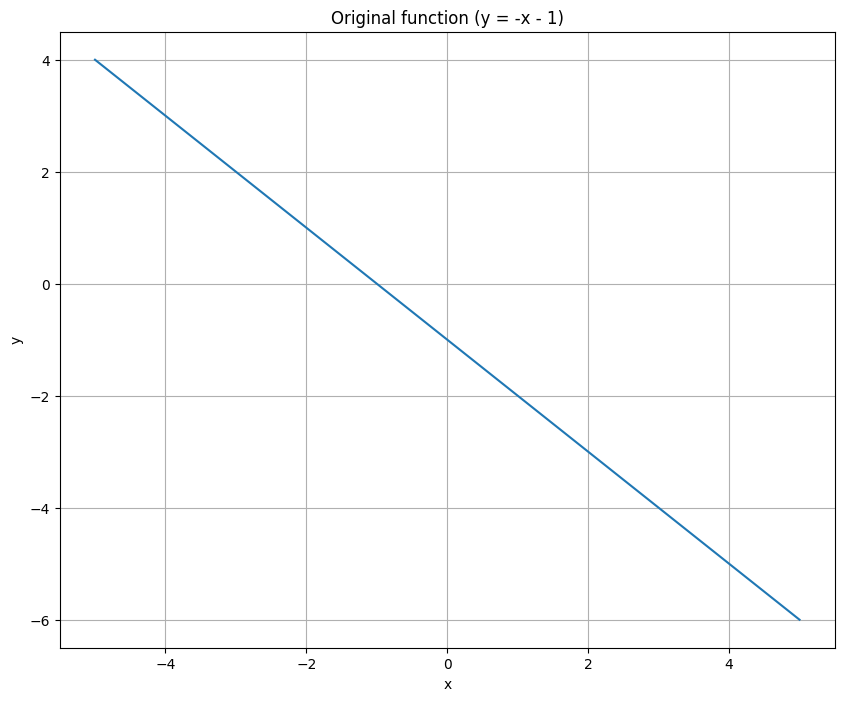

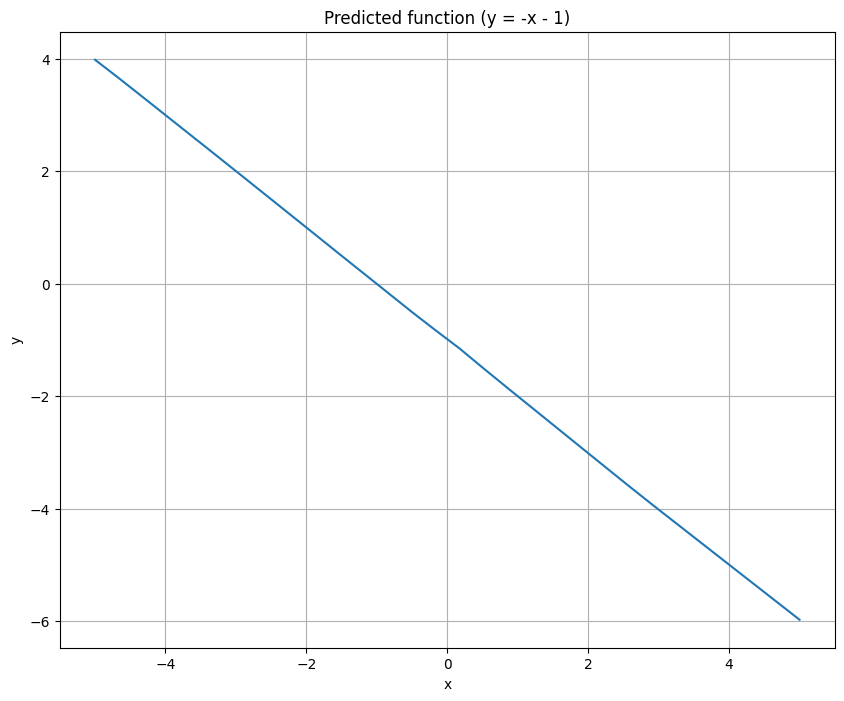

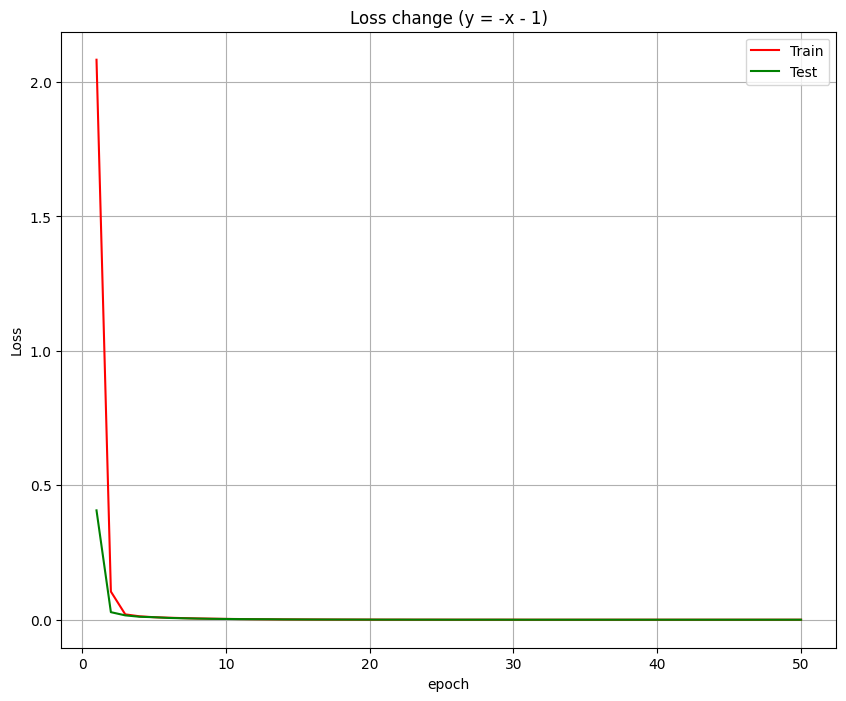

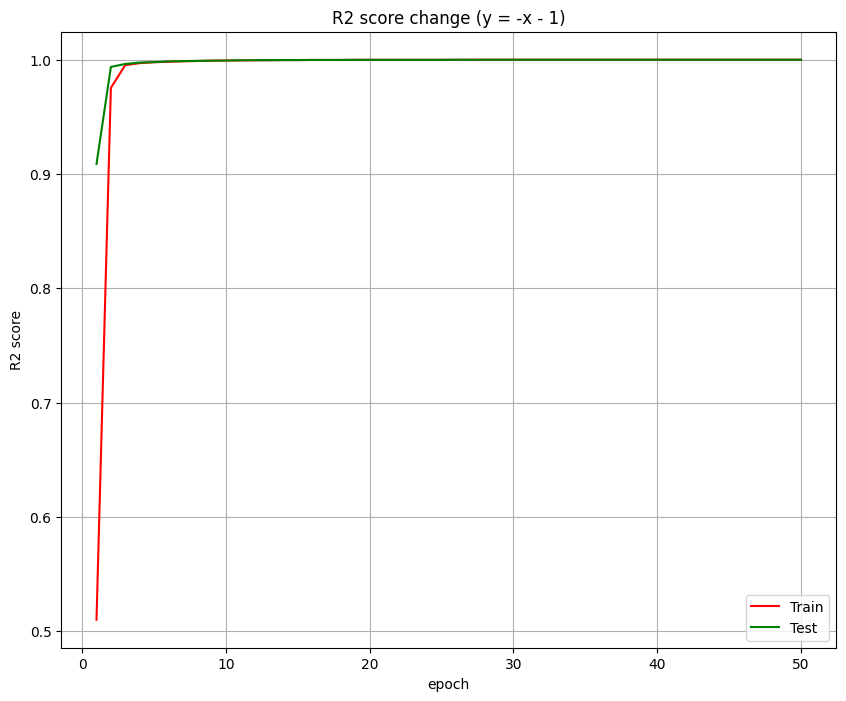

In [10]:
plot_func(
    [d["input"][0].item() for d in train_dataset],
    [d["output"][0].item() for d in train_dataset],
    "Original function (y = -x - 1)",
)

plot_func(
    [d["input"][0].item() for d in test_dataset],
    [pred[0].item() for pred in prediction],
    "Predicted function (y = -x - 1)"
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (y = -x - 1)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (y = -x - 1)')

## Creating model for predicting values of the quadratic function "y = 0.5 * x**2 + 2 * x - 1" and ploting graphs and changes for loss and r2 score

In [11]:
train_dataset, test_dataset = generate_train_test_data(func_quad)

layers = [
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(1),
    layers,
    optimizer=Adam(learning_rate=0.0005),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 30

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=1, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/30, train loss: 12.738, train R2 score: 0.4743, test loss: 2.3412, test R2 score: 0.909, epoch time: 0.098s
Epoch: 2/30, train loss: 1.9974, train R2 score: 0.9176, test loss: 1.2946, test R2 score: 0.9497, epoch time: 0.093s
Epoch: 3/30, train loss: 0.8132, train R2 score: 0.9664, test loss: 0.6195, test R2 score: 0.9759, epoch time: 0.09s
Epoch: 4/30, train loss: 0.6, train R2 score: 0.9752, test loss: 1.1972, test R2 score: 0.9535, epoch time: 0.082s
Epoch: 5/30, train loss: 0.6125, train R2 score: 0.9747, test loss: 0.5417, test R2 score: 0.9789, epoch time: 0.099s
Epoch: 6/30, train loss: 0.5414, train R2 score: 0.9777, test loss: 0.3718, test R2 score: 0.9855, epoch time: 0.098s
Epoch: 7/30, train loss: 0.3931, train R2 score: 0.9838, test loss: 0.6656, test R2 score: 0.9741, epoch time: 0.096s
Epoch: 8/30, train loss: 0.6086, train R2 score: 0.9749, test loss: 0.3343, test R2 score: 0.987, epoch time: 0.089s
Epoch: 9/30, train loss: 0.1904, train R2 score: 0.9921, test 

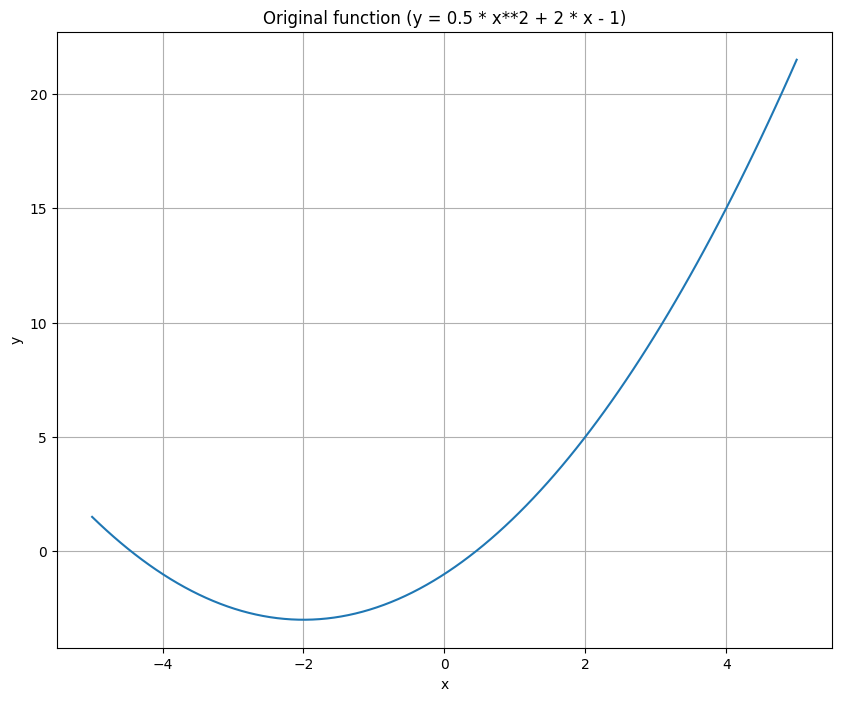

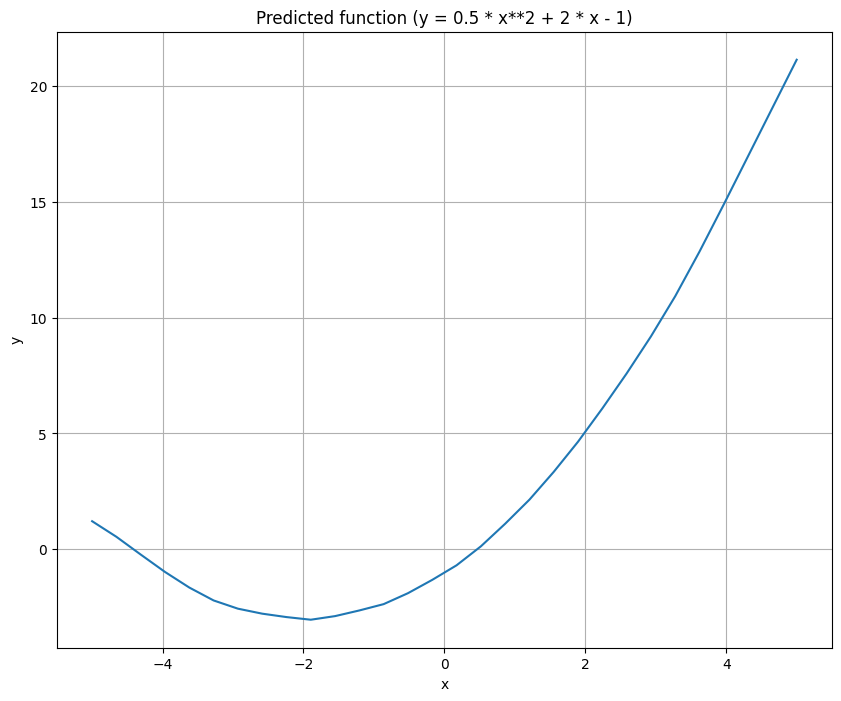

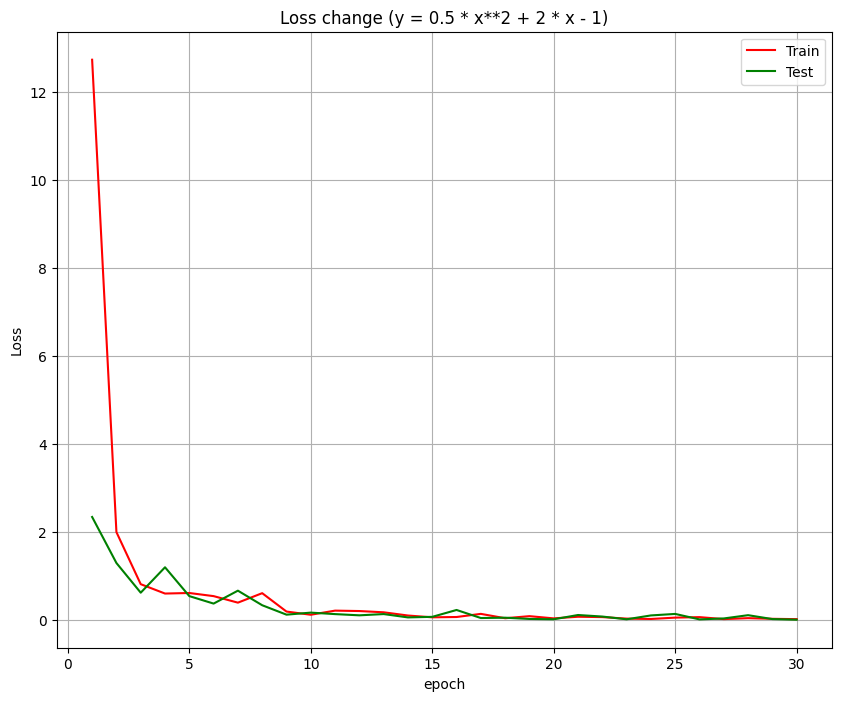

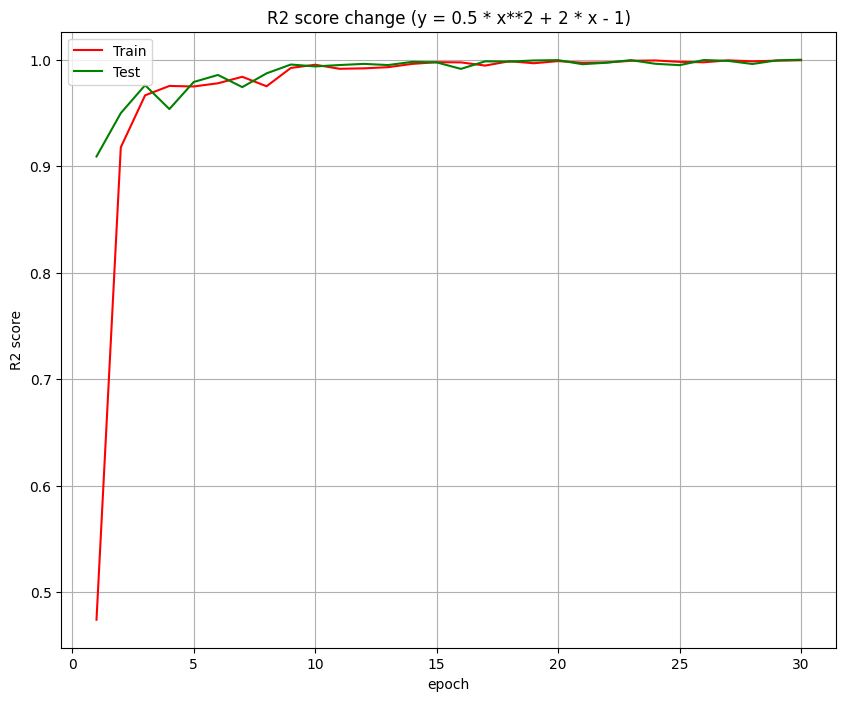

In [12]:
plot_func(
    [d["input"][0].item() for d in train_dataset],
    [d["output"][0].item() for d in train_dataset],
    "Original function (y = 0.5 * x**2 + 2 * x - 1)",
)

plot_func(
    [d["input"][0].item() for d in test_dataset],
    [pred[0].item() for pred in prediction],
    "Predicted function (y = 0.5 * x**2 + 2 * x - 1)"
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (y = 0.5 * x**2 + 2 * x - 1)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (y = 0.5 * x**2 + 2 * x - 1)')

# Creating model for predicting values of the 3d quadratic function "z = 0.2 * x**2 + 0.2 * y**2" and ploting graphs and changes for loss and r2 score

In [13]:
train_dataset, test_dataset = generate_train_test_data_3d(func_quad_3d)

layers = [
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(2),
    layers,
    optimizer=Adam(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 10

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=16, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/10, train loss: 2.5861, train R2 score: -0.0756, test loss: 0.5585, test R2 score: 0.7793, epoch time: 1.653s
Epoch: 2/10, train loss: 0.3821, train R2 score: 0.8411, test loss: 0.2427, test R2 score: 0.9041, epoch time: 1.568s
Epoch: 3/10, train loss: 0.145, train R2 score: 0.9397, test loss: 0.0883, test R2 score: 0.9651, epoch time: 1.506s
Epoch: 4/10, train loss: 0.0514, train R2 score: 0.9786, test loss: 0.0457, test R2 score: 0.9819, epoch time: 1.487s
Epoch: 5/10, train loss: 0.0245, train R2 score: 0.9898, test loss: 0.0156, test R2 score: 0.9938, epoch time: 1.364s
Epoch: 6/10, train loss: 0.011, train R2 score: 0.9954, test loss: 0.0191, test R2 score: 0.9925, epoch time: 1.398s
Epoch: 7/10, train loss: 0.0071, train R2 score: 0.997, test loss: 0.0158, test R2 score: 0.9938, epoch time: 1.339s
Epoch: 8/10, train loss: 0.0047, train R2 score: 0.9981, test loss: 0.0041, test R2 score: 0.9984, epoch time: 1.462s
Epoch: 9/10, train loss: 0.0033, train R2 score: 0.9986, t

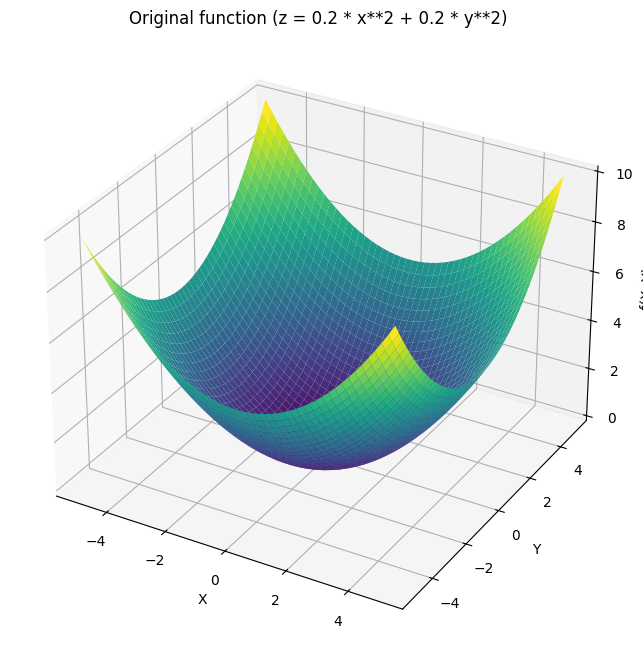

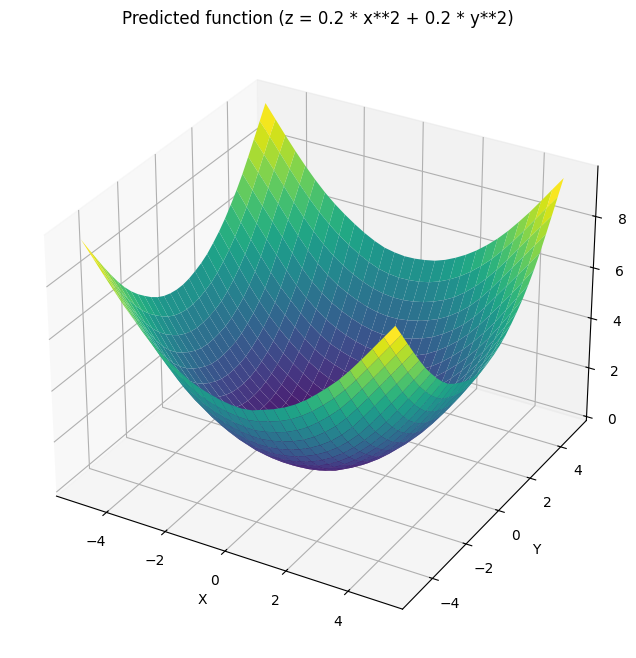

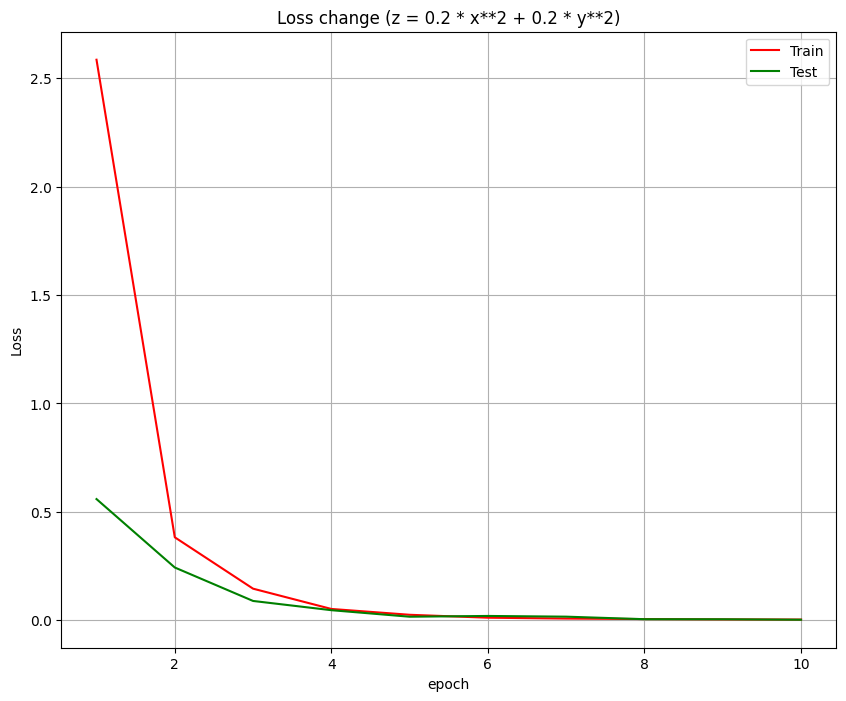

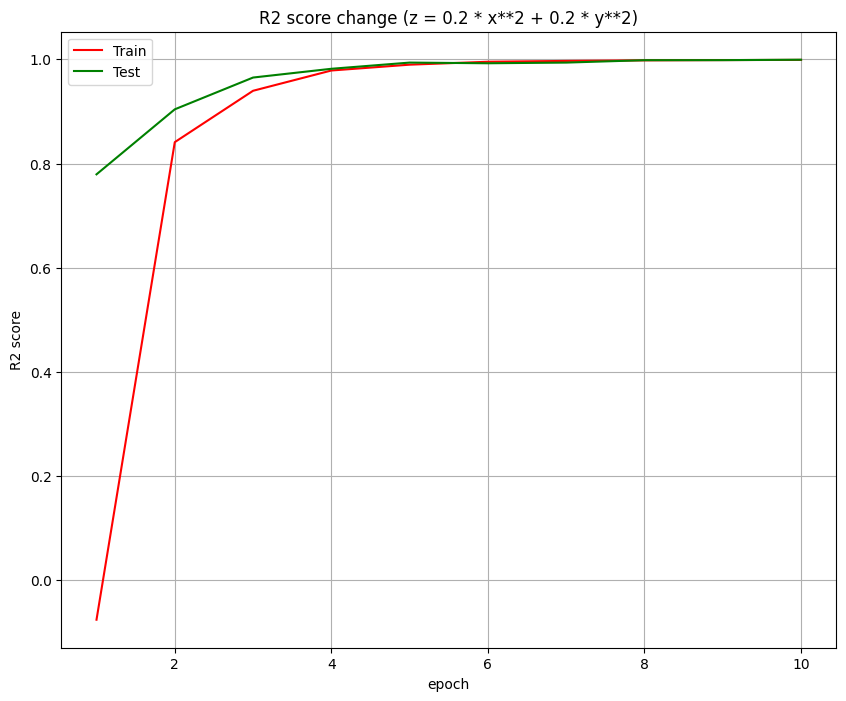

In [14]:
plot_func_3d(
    torch.tensor([[train_dataset[j*50 + i]['input'][0].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['input'][1].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['output'][0].item() for i in range(50)] for j in range(50)]),
    'Original function (z = 0.2 * x**2 + 0.2 * y**2)'
)

plot_func_3d(
    torch.tensor([[test_dataset[j*30 + i]['input'][0].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[test_dataset[j*30 + i]['input'][1].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[prediction[j*30 + i][0].item() for i in range(30)] for j in range(30)]),
    'Predicted function (z = 0.2 * x**2 + 0.2 * y**2)'
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (z = 0.2 * x**2 + 0.2 * y**2)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (z = 0.2 * x**2 + 0.2 * y**2)')

## Creating model for predicting values of the 3d function "z = sin(x) + cos(y)" and ploting graphs and changes for loss and r2 score

In [15]:
train_dataset, test_dataset = generate_train_test_data_3d(func_sin_plus_cos_3d)

layers = [
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(2),
    layers,
    optimizer=Adam(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 10

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=16, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/10, train loss: 0.3777, train R2 score: 0.2188, test loss: 0.2963, test R2 score: 0.3888, epoch time: 1.74s
Epoch: 2/10, train loss: 0.2142, train R2 score: 0.557, test loss: 0.1456, test R2 score: 0.6997, epoch time: 1.52s
Epoch: 3/10, train loss: 0.1015, train R2 score: 0.79, test loss: 0.0847, test R2 score: 0.8253, epoch time: 1.581s
Epoch: 4/10, train loss: 0.052, train R2 score: 0.8925, test loss: 0.0423, test R2 score: 0.9127, epoch time: 1.697s
Epoch: 5/10, train loss: 0.0293, train R2 score: 0.9394, test loss: 0.0234, test R2 score: 0.9517, epoch time: 1.701s
Epoch: 6/10, train loss: 0.0166, train R2 score: 0.9657, test loss: 0.0216, test R2 score: 0.9555, epoch time: 1.669s
Epoch: 7/10, train loss: 0.011, train R2 score: 0.9772, test loss: 0.0117, test R2 score: 0.9758, epoch time: 1.854s
Epoch: 8/10, train loss: 0.0084, train R2 score: 0.9827, test loss: 0.0079, test R2 score: 0.9837, epoch time: 1.588s
Epoch: 9/10, train loss: 0.0064, train R2 score: 0.9868, test l

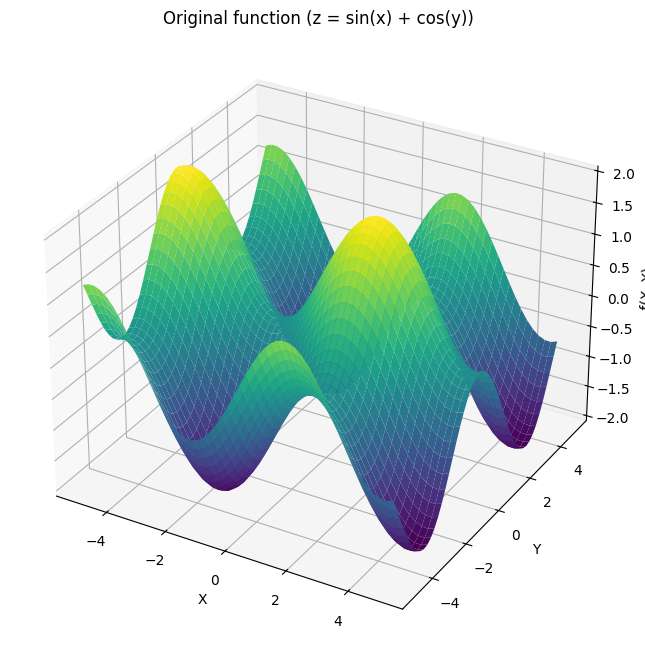

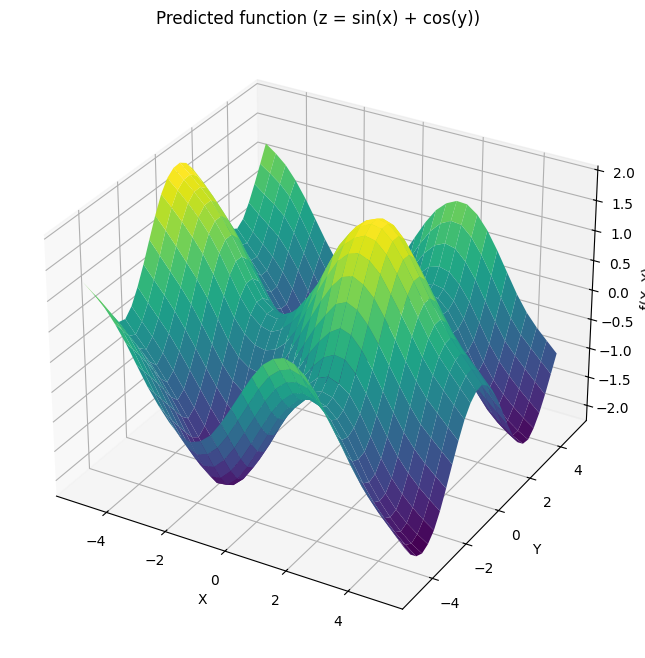

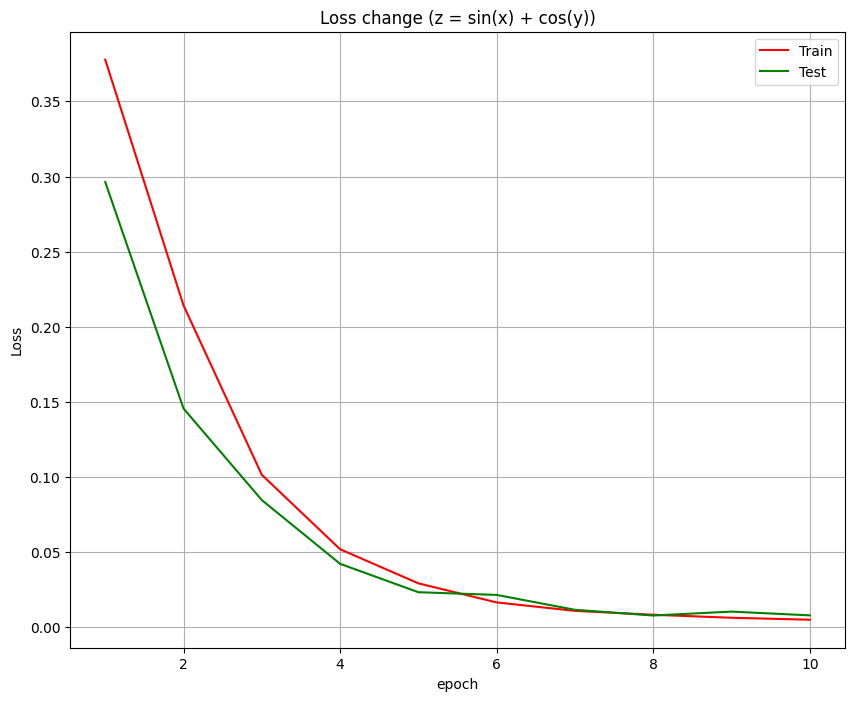

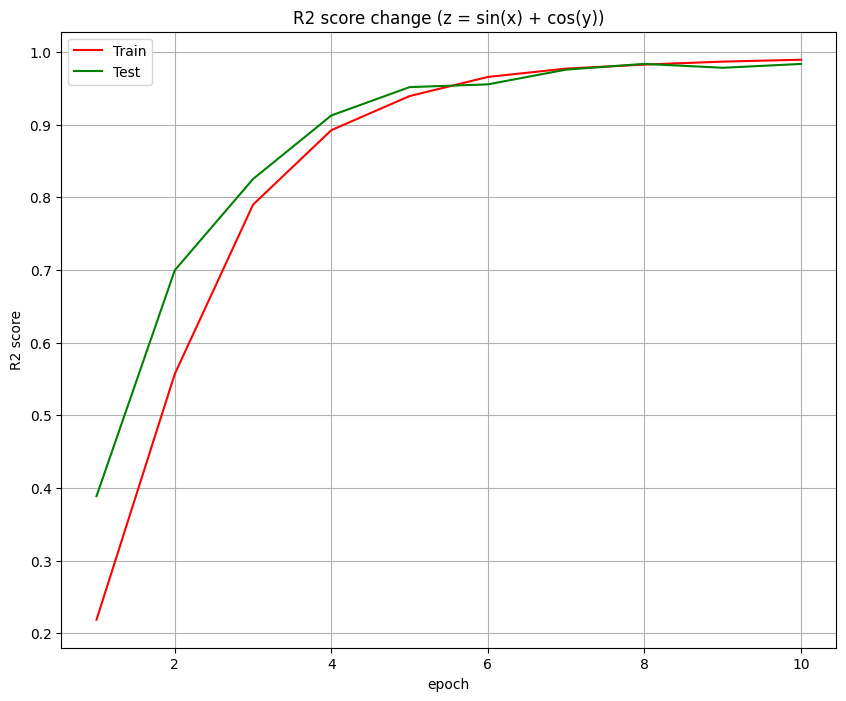

In [16]:
plot_func_3d(
    torch.tensor([[train_dataset[j*50 + i]['input'][0].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['input'][1].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['output'][0].item() for i in range(50)] for j in range(50)]),
    'Original function (z = sin(x) + cos(y))'
)

plot_func_3d(
    torch.tensor([[test_dataset[j*30 + i]['input'][0].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[test_dataset[j*30 + i]['input'][1].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[prediction[j*30 + i][0].item() for i in range(30)] for j in range(30)]),
    'Predicted function (z = sin(x) + cos(y))'
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (z = sin(x) + cos(y))')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (z = sin(x) + cos(y))')